# Module 3 Lab Exercise: Machine Learning Workflow and Types of Learning

## Learning Objectives
By the end of this lab, you will be able to:
- Distinguish between supervised, unsupervised, and reinforcement learning
- Understand the complete machine learning workflow
- Build and evaluate your first classification model
- Work with different types of data (numerical, categorical, text, images)
- Apply the end-to-end ML process: data ‚Üí model ‚Üí evaluation ‚Üí insights

## Prerequisites
- Completed Module 2 (familiar with Python libraries and Jupyter/Colab)
- Understanding of basic data operations and visualization
- Access to your GitHub repository for saving work

---

## Part 1: Understanding Types of Machine Learning

Machine learning can be categorized into three main types. Let's explore each with practical examples.

### 1. Supervised Learning
**Definition**: Learning from labeled examples to make predictions on new, unseen data.

**Examples**:
- **Classification**: Predicting categories (spam/not spam, disease/healthy)
- **Regression**: Predicting continuous values (house prices, temperature)

**Key Characteristic**: We have both input features (X) and correct answers (y) during training.

### 2. Unsupervised Learning
**Definition**: Finding hidden patterns in data without labeled examples.

**Examples**:
- **Clustering**: Grouping similar customers for marketing
- **Dimensionality Reduction**: Simplifying complex data while keeping important information

**Key Characteristic**: We only have input features (X), no correct answers during training.

### 3. Reinforcement Learning
**Definition**: Learning through trial and error by receiving rewards or penalties.

**Examples**:
- Game playing (chess, Go)
- Autonomous vehicles
- Recommendation systems that learn from user feedback

**Key Characteristic**: Agent learns by interacting with an environment and receiving feedback.

**For this course, we'll focus primarily on supervised learning, with some unsupervised learning in later modules.**

## Part 2: Setting Up Our Machine Learning Environment

Let's start by importing our libraries and loading a dataset that will help us understand the ML workflow.

In [17]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

print("‚úÖ All libraries imported successfully!")
print("üöÄ Ready to start our machine learning journey!")

‚úÖ All libraries imported successfully!
üöÄ Ready to start our machine learning journey!


## Part 3: Loading and Exploring Our Dataset

We'll use the Wine dataset - a classic dataset for classification. It contains chemical analysis of wines from three different cultivars (types) grown in Italy.

In [19]:
# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame for easier handling
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['wine_class'] = wine_data.target
df['wine_class_name'] = [wine_data.target_names[i] for i in wine_data.target]

print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Features: {len(wine_data.feature_names)}")
print(f"Classes: {wine_data.target_names}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset Information:
Shape: (178, 15)
Features: 13
Classes: ['class_0' 'class_1' 'class_2']

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39

In [20]:
# Explore the dataset structure
print("Dataset Overview:")
print("=" * 50)
print(f"Total samples: {len(df)}")
print(f"Features (input variables): {len(df.columns) - 2}")  # -2 for target columns
print(f"Target classes: {df['wine_class_name'].unique()}")
print(f"\nClass distribution:")
print(df['wine_class_name'].value_counts())

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")
print("‚úÖ No missing values - this is a clean dataset!")

Dataset Overview:
Total samples: 178
Features (input variables): 13
Target classes: [np.str_('class_0') np.str_('class_1') np.str_('class_2')]

Class distribution:
wine_class_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

Missing values: 0
‚úÖ No missing values - this is a clean dataset!


## Part 4: Exploratory Data Analysis (EDA)

Before building models, we need to understand our data. This is a crucial step in the ML workflow.

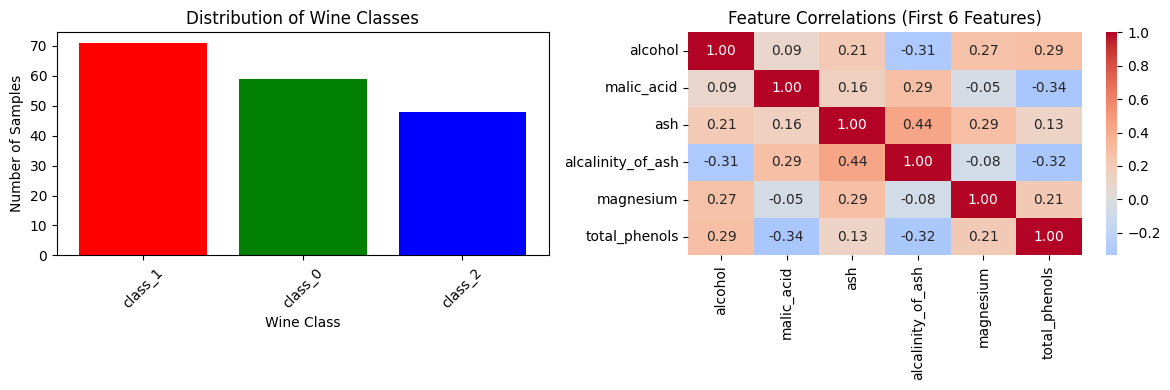

üìä EDA helps us understand:
- Class balance (are all classes equally represented?)
- Feature relationships (which features are correlated?)
- Data quality (any outliers or issues?)


In [21]:
# Visualize class distribution
plt.figure(figsize=(12, 4))

# Subplot 1: Class distribution
plt.subplot(1, 2, 1)
class_counts = df['wine_class_name'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['red', 'green', 'blue'])
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

# Subplot 2: Feature correlation heatmap (first 6 features for clarity)
plt.subplot(1, 2, 2)
correlation_matrix = df.iloc[:, :6].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlations (First 6 Features)')

plt.tight_layout()
plt.show()

print("üìä EDA helps us understand:")
print("- Class balance (are all classes equally represented?)")
print("- Feature relationships (which features are correlated?)")
print("- Data quality (any outliers or issues?)")

## Part 5: The Complete Machine Learning Workflow

Now let's implement the standard ML workflow step by step:

### The 6-Step ML Workflow:
1. **Data Preparation**: Clean and prepare the data
2. **Feature Selection**: Choose relevant input variables
3. **Data Splitting**: Separate training and testing data
4. **Model Training**: Teach the algorithm using training data
5. **Model Evaluation**: Test performance on unseen data
6. **Model Interpretation**: Understand what the model learned

Let's implement each step!

In [22]:
# Step 1: Data Preparation
print("Step 1: Data Preparation")
print("=" * 30)

# Select features (X) and target (y)
# For simplicity, let's use the first 4 features
feature_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
X = df[feature_names]
y = df['wine_class']

print(f"Selected features: {feature_names}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Display first few rows
print("\nFirst 5 samples:")
print(X.head())

Step 1: Data Preparation
Selected features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
Feature matrix shape: (178, 4)
Target vector shape: (178,)

First 5 samples:
   alcohol  malic_acid   ash  alcalinity_of_ash
0    14.23        1.71  2.43               15.6
1    13.20        1.78  2.14               11.2
2    13.16        2.36  2.67               18.6
3    14.37        1.95  2.50               16.8
4    13.24        2.59  2.87               21.0


In [23]:
# Step 2: Data Splitting
print("Step 2: Data Splitting")
print("=" * 30)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducible results
    stratify=y          # Maintain class proportions
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training classes: {np.bincount(y_train)}")
print(f"Testing classes: {np.bincount(y_test)}")

print("\nüéØ Why split data?")
print("- Training set: Teach the model")
print("- Testing set: Evaluate performance on unseen data")
print("- This prevents overfitting (memorizing vs. learning)")

Step 2: Data Splitting
Training set: 142 samples
Testing set: 36 samples
Training classes: [47 57 38]
Testing classes: [12 14 10]

üéØ Why split data?
- Training set: Teach the model
- Testing set: Evaluate performance on unseen data
- This prevents overfitting (memorizing vs. learning)


In [24]:
# Step 3: Model Training
print("Step 3: Model Training")
print("=" * 30)

# Create and train two different models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3)
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    trained_models[name] = model
    
    print(f"‚úÖ {name} training completed!")

print("\nü§ñ What happened during training?")
print("- Models learned patterns from training data")
print("- They found relationships between features and wine classes")
print("- Now they can make predictions on new data!")

Step 3: Model Training

Training Logistic Regression...
‚úÖ Logistic Regression training completed!

Training Decision Tree...
‚úÖ Decision Tree training completed!

ü§ñ What happened during training?
- Models learned patterns from training data
- They found relationships between features and wine classes
- Now they can make predictions on new data!


In [25]:
# Step 4: Model Evaluation
print("Step 4: Model Evaluation")
print("=" * 30)

results = {}

for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
    
    # Detailed classification report
    print("\nDetailed Performance:")
    print(classification_report(y_test, y_pred, target_names=wine_data.target_names))

# Compare models
print("\nüìä Model Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.3f}")
    
best_model = max(results, key=results.get)
print(f"\nüèÜ Best performing model: {best_model}")

Step 4: Model Evaluation

Logistic Regression Results:
Accuracy: 0.889 (88.9%)

Detailed Performance:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.81      0.93      0.87        14
     class_2       0.88      0.70      0.78        10

    accuracy                           0.89        36
   macro avg       0.90      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36


Decision Tree Results:
Accuracy: 0.833 (83.3%)

Detailed Performance:
              precision    recall  f1-score   support

     class_0       0.86      1.00      0.92        12
     class_1       0.91      0.71      0.80        14
     class_2       0.73      0.80      0.76        10

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36


üìä Model Comparison:
Logistic Regression: 0.889
Decision Tree:

Step 5: Model Interpretation


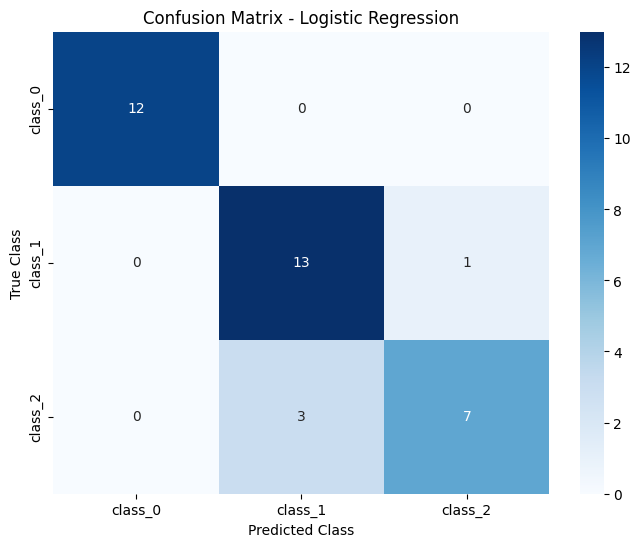


üîç Interpreting the Confusion Matrix:
- Diagonal values: Correct predictions
- Off-diagonal values: Misclassifications
- Perfect model would have all values on diagonal


In [26]:
# Step 5: Model Interpretation
print("Step 5: Model Interpretation")
print("=" * 30)

# Visualize confusion matrix for the best model
best_model_obj = trained_models[best_model]
y_pred_best = best_model_obj.predict(X_test)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print(f"\nüîç Interpreting the Confusion Matrix:")
print("- Diagonal values: Correct predictions")
print("- Off-diagonal values: Misclassifications")
print("- Perfect model would have all values on diagonal")

## Part 6: Understanding Different Data Types in ML

Machine learning works with various types of data. Let's explore the main categories:

In [27]:
# Understanding Different Data Types in ML
print("Understanding Data Types in Machine Learning")
print("=" * 45)

# Create examples of different data types
data_examples = {
    'Numerical (Continuous)': [23.5, 45.2, 67.8, 12.1, 89.3],
    'Numerical (Discrete)': [1, 5, 3, 8, 2],
    'Categorical (Nominal)': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Categorical (Ordinal)': ['Low', 'Medium', 'High', 'Medium', 'Low'],
    'Text': ['Hello world', 'Machine learning', 'Data science', 'Python programming', 'AI revolution'],
    'Boolean': [True, False, True, True, False]
}

for data_type, examples in data_examples.items():
    print(f"\n{data_type}:")
    print(f"  Examples: {examples}")
    print(f"  Use case: ", end="")
    
    if 'Continuous' in data_type:
        print("Regression problems (predicting prices, temperatures)")
    elif 'Discrete' in data_type:
        print("Counting problems (number of items, ratings)")
    elif 'Nominal' in data_type:
        print("Classification without order (colors, categories)")
    elif 'Ordinal' in data_type:
        print("Classification with order (ratings, sizes)")
    elif 'Text' in data_type:
        print("Natural language processing (sentiment analysis, translation)")
    elif 'Boolean' in data_type:
        print("Binary classification (yes/no, spam/not spam)")

print("\nüí° Key Insight: Different data types require different preprocessing and algorithms!")

Understanding Data Types in Machine Learning

Numerical (Continuous):
  Examples: [23.5, 45.2, 67.8, 12.1, 89.3]
  Use case: Regression problems (predicting prices, temperatures)

Numerical (Discrete):
  Examples: [1, 5, 3, 8, 2]
  Use case: Counting problems (number of items, ratings)

Categorical (Nominal):
  Examples: ['Red', 'Blue', 'Green', 'Red', 'Blue']
  Use case: Classification without order (colors, categories)

Categorical (Ordinal):
  Examples: ['Low', 'Medium', 'High', 'Medium', 'Low']
  Use case: Classification with order (ratings, sizes)

Text:
  Examples: ['Hello world', 'Machine learning', 'Data science', 'Python programming', 'AI revolution']
  Use case: Natural language processing (sentiment analysis, translation)

Boolean:
  Examples: [True, False, True, True, False]
  Use case: Binary classification (yes/no, spam/not spam)

üí° Key Insight: Different data types require different preprocessing and algorithms!


## Part 7: Hands-On Practice - Build Your Own Model

Now it's your turn! Complete the following tasks to reinforce your learning.

In [28]:
# Task 1: Try different features
print("Task 1: Experiment with Different Features")
print("=" * 40)

# Your task: Select 3 different features and build a model
# Available features:
print("Available features:")
for i, feature in enumerate(wine_data.feature_names):
    print(f"{i+1:2d}. {feature}")

# TODO: Replace these with your chosen features
your_features = ['alcohol', 'hue', 'proline']  # Modify this list

# Build model with your features
X_your = df[your_features]
X_train_your, X_test_your, y_train_your, y_test_your = train_test_split(
    X_your, y, test_size=0.2, random_state=42, stratify=y
)

# Train a logistic regression model
your_model = LogisticRegression(random_state=42)
your_model.fit(X_train_your, y_train_your)

# Evaluate
y_pred_your = your_model.predict(X_test_your)
your_accuracy = accuracy_score(y_test_your, y_pred_your)

print(f"\nYour model features: {your_features}")
print(f"Your model accuracy: {your_accuracy:.3f} ({your_accuracy*100:.1f}%)")

# Compare with original model
print(f"Original model accuracy: {results['Logistic Regression']:.3f}")
if your_accuracy > results['Logistic Regression']:
    print("üéâ Great job! Your feature selection improved the model!")
else:
    print("ü§î Try different features to see if you can improve performance!")

Task 1: Experiment with Different Features
Available features:
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Your model features: ['alcohol', 'hue', 'proline']
Your model accuracy: 0.972 (97.2%)
Original model accuracy: 0.889
üéâ Great job! Your feature selection improved the model!


## Part 8: Assessment - Understanding ML Concepts

Answer the following questions to demonstrate your understanding:

In [29]:
# Assessment Task 1: Identify the ML type
print("Assessment Task 1: Identify Machine Learning Types")
print("=" * 50)

# For each scenario, identify if it's Supervised, Unsupervised, or Reinforcement Learning

scenarios = [
    "Predicting house prices based on size, location, and age",
    "Grouping customers by purchasing behavior without knowing groups beforehand",
    "Teaching a robot to play chess by playing many games",
    "Classifying emails as spam or not spam using labeled examples",
    "Finding hidden topics in news articles without predefined categories"
]

# Your answers (replace 'TYPE' with Supervised, Unsupervised, or Reinforcement)
your_answers = [
    "Supervised",      # Scenario 1
    "Unsupervised",    # Scenario 2  
    "Reinforcement",   # Scenario 3
    "Supervised",      # Scenario 4
    "Unsupervised"     # Scenario 5
]

# Check answers
correct_answers = ["Supervised", "Unsupervised", "Reinforcement", "Supervised", "Unsupervised"]

print("Scenario Analysis:")
score = 0
for i, (scenario, your_answer, correct) in enumerate(zip(scenarios, your_answers, correct_answers)):
    is_correct = your_answer == correct
    score += is_correct
    status = "‚úÖ" if is_correct else "‚ùå"
    print(f"{status} {i+1}. {scenario}")
    print(f"   Your answer: {your_answer} | Correct: {correct}")
    print()

print(f"Score: {score}/{len(scenarios)} ({score/len(scenarios)*100:.0f}%)")

Assessment Task 1: Identify Machine Learning Types
Scenario Analysis:
‚úÖ 1. Predicting house prices based on size, location, and age
   Your answer: Supervised | Correct: Supervised

‚úÖ 2. Grouping customers by purchasing behavior without knowing groups beforehand
   Your answer: Unsupervised | Correct: Unsupervised

‚úÖ 3. Teaching a robot to play chess by playing many games
   Your answer: Reinforcement | Correct: Reinforcement

‚úÖ 4. Classifying emails as spam or not spam using labeled examples
   Your answer: Supervised | Correct: Supervised

‚úÖ 5. Finding hidden topics in news articles without predefined categories
   Your answer: Unsupervised | Correct: Unsupervised

Score: 5/5 (100%)


## Part 9: Real-World Applications and Case Studies

Let's explore how the concepts we've learned apply to real-world scenarios.

### Case Study 1: Recommendation Systems (Netflix, Amazon)
**Problem**: Suggest movies/products users might like
**ML Type**: Hybrid (Supervised + Unsupervised + Reinforcement)
**Data**: User ratings, viewing history, product features
**Workflow**: Collect data ‚Üí Build user profiles ‚Üí Train models ‚Üí Make recommendations ‚Üí Learn from feedback

### Case Study 2: Fraud Detection (Banks, Credit Cards)
**Problem**: Identify fraudulent transactions
**ML Type**: Supervised Learning (Classification)
**Data**: Transaction amounts, locations, times, merchant types
**Workflow**: Historical fraud data ‚Üí Feature engineering ‚Üí Train classifier ‚Üí Real-time scoring ‚Üí Continuous monitoring

### Case Study 3: Medical Diagnosis (Healthcare)
**Problem**: Assist doctors in diagnosing diseases
**ML Type**: Supervised Learning (Classification)
**Data**: Medical images, patient symptoms, lab results
**Workflow**: Labeled medical data ‚Üí Image processing ‚Üí Train deep learning models ‚Üí Clinical validation ‚Üí Deployment with human oversight

### Your Turn: Think of Applications
Consider these industries and think about how ML could be applied:
- **Transportation**: Autonomous vehicles, route optimization
- **Agriculture**: Crop monitoring, yield prediction
- **Education**: Personalized learning, automated grading
- **Entertainment**: Content creation, game AI

## Part 10: Complete ML Workflow Summary

Let's summarize the complete machine learning workflow we've learned:

### üîÑ The Machine Learning Lifecycle

```
1. Problem Definition
   ‚Üì
2. Data Collection & Exploration
   ‚Üì
3. Data Preprocessing & Feature Engineering
   ‚Üì
4. Model Selection & Training
   ‚Üì
5. Model Evaluation & Validation
   ‚Üì
6. Model Deployment & Monitoring
   ‚Üì
7. Continuous Improvement
```

### üìã Checklist for Every ML Project:

**Data Phase:**
- [ ] Understand the problem and define success metrics
- [ ] Collect and explore the dataset
- [ ] Check for missing values, outliers, and data quality issues
- [ ] Visualize data to understand patterns and relationships

**Modeling Phase:**
- [ ] Split data into training and testing sets
- [ ] Select appropriate algorithms for the problem type
- [ ] Train multiple models and compare performance
- [ ] Evaluate using appropriate metrics (accuracy, precision, recall, etc.)

**Deployment Phase:**
- [ ] Validate model performance on new data
- [ ] Document the model and its limitations
- [ ] Deploy responsibly with monitoring systems
- [ ] Plan for model updates and maintenance

### üéØ Key Takeaways:
1. **Start Simple**: Begin with basic models before trying complex ones
2. **Understand Your Data**: EDA is crucial for success
3. **Validate Properly**: Always test on unseen data
4. **Iterate**: ML is an iterative process of improvement
5. **Document Everything**: Keep track of experiments and results

## Your Reflection and Analysis

**Instructions**: Complete the reflection below by editing this markdown cell.

### My Understanding of Machine Learning Types

**Supervised Learning**: Using labeled data to make predictions

**Unsupervised Learning**: Using unlabeled data to find patterns

**Reinforcement Learning**: Operates on a reward system/feedback loop

### My Analysis of the Wine Classification Project

**Best performing model**: Logisitc Regression

**Why do you think this model performed better?**: I believed this model performed better, because the data was well-structured which makes learning the patterns more easily.

**What would you try next to improve performance?**: My idea would be to add more features to improve the results/accuracy, because this would allow the ML to feed off of more relational data.

### Real-World Application Ideas

**Industry of Interest**: Environmental Studies

**ML Problem**: Predicting areas at risk of deforestation or identifying pollution patterns using satellite images.

**Type of ML**: Supervised Learning

**Data Needed**: Satellite images, deforestation maps, carbon emission data

### Key Learnings

**Most important concept learned**: I learned how different models work along with training my first model to produce the best results. I also learned how important ML workflow is to have functioning models that have little to no error.

**Most challenging part**: The most challenging part for me was finding out which three features gave the highest model accuracy, but I found the highest to be alcohol, proline, and hue.

**Questions for further exploration**: Can you make another ML to test out the features then come out with the best results by itself?

## Lab Summary and Next Steps

### üéØ What You've Accomplished:
‚úÖ **Understood ML Types**: Supervised, Unsupervised, and Reinforcement Learning  
‚úÖ **Mastered ML Workflow**: Data ‚Üí Model ‚Üí Evaluation ‚Üí Insights  
‚úÖ **Built Classification Models**: Logistic Regression and Decision Trees  
‚úÖ **Evaluated Model Performance**: Accuracy, Confusion Matrix, Classification Report  
‚úÖ **Worked with Real Data**: Wine dataset analysis and modeling  
‚úÖ **Applied Best Practices**: Data splitting, model comparison, interpretation  

### üöÄ Preparation for Module 4:
In the next lab, you'll dive deeper into:
- **Exploratory Data Analysis (EDA)**: Advanced visualization techniques
- **Data Quality Assessment**: Handling missing values, outliers, and duplicates
- **Statistical Analysis**: Understanding distributions and relationships
- **Data Storytelling**: Communicating insights effectively

### üìù Action Items:
1. **Upload this notebook** to your GitHub repository
2. **Experiment** with different features in the wine dataset
3. **Try other datasets** from sklearn.datasets (digits, breast_cancer, boston)
4. **Practice** the 6-step ML workflow on a new problem
5. **Document** your experiments and findings

### üîó Additional Resources:
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Machine Learning Mastery](https://machinelearningmastery.com/)
- [Kaggle Learn](https://www.kaggle.com/learn) - Free micro-courses
- [Google's Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)

### üí≠ Reflection Questions:
1. Which type of machine learning (supervised/unsupervised/reinforcement) interests you most and why?
2. What was the most challenging part of the ML workflow for you?
3. How might you apply these concepts to a problem in your field of interest?
4. What questions do you have about machine learning that you'd like to explore further?

**Congratulations on completing Module 3! You've taken a significant step in your machine learning journey.** üéâ

---

*Remember: Machine learning is a skill that improves with practice. Keep experimenting, stay curious, and don't be afraid to make mistakes - they're part of the learning process!*